In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Читаю файл
data = pd.read_excel(r'../Датасеты/Тестовое задание.xlsx')

In [3]:
data.head()

,Дата,ТВ-шоу,Эпизод,устройство,views
0,2021-04-03,Тайтл 2,4,Mobile Application,0
1,2021-04-04,Тайтл 2,4,Mobile Application,7598
2,2021-04-04,Тайтл 2,4,SmartTV,4084
3,2021-04-04,Тайтл 2,4,Desktop,3474
4,2021-04-04,Тайтл 2,4,Mobile,2337


In [4]:
#Смотрю на количественные данные. Вижу, что есть эпизоды, у которых нет просмотров. Возможно, это ошибка.
data.describe()

,Эпизод,views
count,2176.000000,2176.000000
mean,3.921875,413.624081
std,1.953331,709.055765
min,1.000000,0.000000
25%,2.000000,78.000000
50%,4.000000,185.500000
75%,5.000000,453.500000
max,8.000000,7598.000000


In [5]:
#Таких эпизодов всего 22 из 2176
len(data[data['views'] == 0])

22

In [6]:
#Просмотров нет именно у второго тайтла.
data[data['views'] == 0]

,Дата,ТВ-шоу,Эпизод,устройство,views
0,2021-04-03,Тайтл 2,4,Mobile Application,0
1542,2021-05-03,Тайтл 2,4,Desktop,0
1543,2021-05-03,Тайтл 2,4,Mobile,0
1544,2021-05-03,Тайтл 2,4,Mobile Application,0
1590,2021-05-04,Тайтл 2,4,Mobile Application,0
1591,2021-05-04,Тайтл 2,4,Desktop,0
1592,2021-05-04,Тайтл 2,4,Mobile,0
1638,2021-05-05,Тайтл 2,4,Desktop,0
1684,2021-05-06,Тайтл 2,4,Desktop,0
1775,2021-05-08,Тайтл 2,4,Mobile,0


In [7]:
len(data[data['ТВ-шоу'] == 'Тайтл 2'])

726

In [8]:
#Непонятно по каким причинам не отображается кол-во просмотров, но я думаю, что лучше избавиться от этих данных.
data = data[data['views'] > 0]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 1 to 2174
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Дата        2154 non-null   object
 1   ТВ-шоу      2154 non-null   object
 2   Эпизод      2154 non-null   int64 
 3   устройство  2154 non-null   object
 4   views       2154 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 101.0+ KB


In [10]:
#Пропущенных значений нет
data.isnull().sum()

Дата          0
ТВ-шоу        0
Эпизод        0
устройство    0
views         0
dtype: int64

In [11]:
#Есть небольлшые ошибки. Тут 2 мобильные версии и смарт тв 
data.устройство.unique()

array(['Mobile Application', 'SmartTV', 'Desktop', 'Mobile',
       'ТВ-приставки'], dtype=object)

In [12]:
#Меняю
data.loc[data['устройство']=='Mobile Application', 'устройство'] = 'Mobile'
data.loc[data['устройство']=='ТВ-приставки', 'устройство'] = 'SmartTV'

In [13]:
# Здесь ошибок нет
data['ТВ-шоу'].unique()

array(['Тайтл 2', 'Тайтл 1', 'Тайтл 3'], dtype=object)

In [14]:
# Преобразую дату из строки в нужный формат
data['Дата_новая'] = pd.to_datetime(data['Дата'], format="%m/%d/%y", infer_datetime_format=True)

In [15]:
#Все получилось
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 1 to 2174
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Дата        2154 non-null   object        
 1   ТВ-шоу      2154 non-null   object        
 2   Эпизод      2154 non-null   int64         
 3   устройство  2154 non-null   object        
 4   views       2154 non-null   int64         
 5   Дата_новая  2154 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 117.8+ KB


In [16]:
#Самые популярные шоу по кол-ву просмотров
popular_shows = data.groupby(['ТВ-шоу'],as_index = False).views.sum()
popular_shows = popular_shows.rename(columns = {'views':'Просмотры'})

#Количество эпизодов у каждого шоу
count_shows = data.groupby(['ТВ-шоу'],as_index = False).Дата.count()
count_shows = count_shows.rename(columns = {'Дата':'Количество'})

In [17]:
count_shows.head()

,ТВ-шоу,Количество
0,Тайтл 1,620
1,Тайтл 2,704
2,Тайтл 3,830


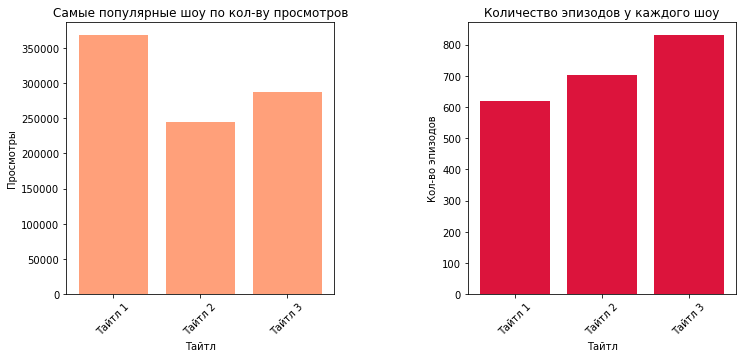

In [18]:
fig = plt.figure()

fig.set_figheight(5)
fig.set_figwidth(12)

ax1 = plt.subplot(1, 2, 1)
plt.bar(popular_shows['ТВ-шоу'], popular_shows['Просмотры'], color = 'lightsalmon')
plt.xticks(rotation=45)
plt.title(r'Самые популярные шоу по кол-ву просмотров')
plt.xlabel('Тайтл')
plt.ylabel('Просмотры')


ax2 = plt.subplot(1, 2, 2)
plt.bar(count_shows['ТВ-шоу'], count_shows['Количество'], color = 'crimson')
plt.xticks(rotation=45)
plt.title(r'Количество эпизодов у каждого шоу')
plt.xlabel('Тайтл')
plt.ylabel('Кол-во эпизодов')

plt.subplots_adjust(wspace=0.5)

По этим графикам видно, что 1 тайтл является самым популярным, несмотря на то, что в нем меньше всего эпизодов.

In [19]:
# С каких устройств чаще всего просматривают ?
devices = data.groupby(['устройство'],as_index = False).Дата.count()
devices = devices.rename(columns = {'Дата':'Количество'})

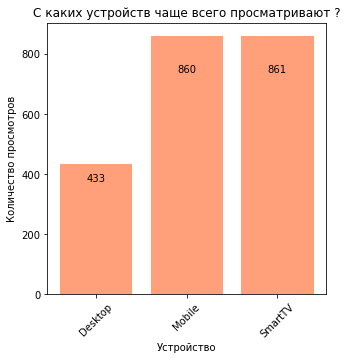

In [20]:
#Визуализация исользщуемых девайсов
fig = plt.figure()

fig.set_figheight(5)
fig.set_figwidth(5)

ax = plt.subplot(1, 1, 1)
plt.bar(devices['устройство'], devices['Количество'], color = 'lightsalmon')
plt.xticks(rotation=45)
plt.title(r'С каких устройств чаще всего просматривают ?')
plt.xlabel('Устройство')
plt.ylabel('Количество просмотров')
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
autolabel(ax.patches, height_factor=0.85)


За первенство борются телевизоры и мобильные устройства. В этой борьбе с отрывом в 1 устройство победил смарт тв. Десктопной версии же пользователи отдают гораздо меньшее предпочтение

In [21]:
#Датафрейм с 5 самыми популярными эпизодами
popular_episodes = data.groupby(['ТВ-шоу', 'Эпизод'],as_index = False).views.sum().sort_values(by = 'views', ascending = False).head(5)
popular_episodes = popular_episodes.rename(columns = {'views':'Просмотры'})

In [22]:
popular_episodes.head()

,ТВ-шоу,Эпизод,Просмотры
0,Тайтл 1,1,89099
10,Тайтл 3,1,82101
1,Тайтл 1,2,76337
3,Тайтл 1,4,73135
4,Тайтл 1,5,68483


In [23]:
#Объединяю 2 колонки в одну
popular_episodes['Эпизод_']=popular_episodes['ТВ-шоу'] + ', ' + popular_episodes['Эпизод'].astype('str') + ' ' +  'эпизод'

In [24]:
#Удаляю старые колонки для переименования новой. Можно и без этого, конечно
del popular_episodes['ТВ-шоу']
del popular_episodes['Эпизод']
popular_episodes = popular_episodes.rename(columns = {'Эпизод_' : 'Эпизод'})
popular_episodes.head()

,Просмотры,Эпизод
0,89099,"Тайтл 1, 1 эпизод"
10,82101,"Тайтл 3, 1 эпизод"
1,76337,"Тайтл 1, 2 эпизод"
3,73135,"Тайтл 1, 4 эпизод"
4,68483,"Тайтл 1, 5 эпизод"


In [25]:
popular_episodes.head()

,Просмотры,Эпизод
0,89099,"Тайтл 1, 1 эпизод"
10,82101,"Тайтл 3, 1 эпизод"
1,76337,"Тайтл 1, 2 эпизод"
3,73135,"Тайтл 1, 4 эпизод"
4,68483,"Тайтл 1, 5 эпизод"


Text(0, 0.5, 'Количество просмотров')

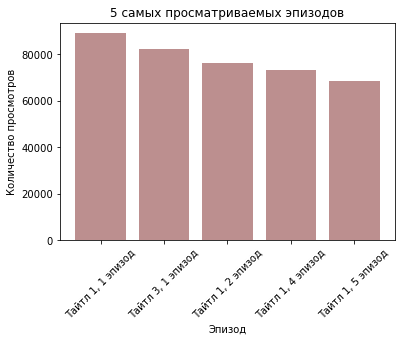

In [26]:
#Визуализация самых просматриваемых эпизодов


ax1 = plt.subplot(1, 1, 1)
plt.bar(popular_episodes['Эпизод'], popular_episodes['Просмотры'], color = 'rosybrown')
plt.xticks(rotation=45)
plt.title(r'5 самых просматриваемых эпизодов')
plt.xlabel('Эпизод')
plt.ylabel('Количество просмотров')


 Из этого графика можно сделать вывод, что самый просматриваемый эпизод - 1 из 1 тайтла. Также можно заметить, что 4 эпизода из 5 относятся к 1 тайтлу. 

In [32]:
#Теперь хочу посмотреть на какой месяц в году приходится больше всего просмтров 
data['День'] = data['Дата_новая'].dt.day
data['Месяц'] = data['Дата_новая'].dt.month


In [33]:
#Визуализаця просмтров по дням
def day_views(month1, df1,title1, month2, df2, title2):   
    data_df1 = data[data['Месяц'] == month1].copy()
    data_df2 = data[data['Месяц'] == month2].copy()
    df1= data_df1.groupby(['День'],as_index = False).views.sum().sort_values(by = 'День', ascending = True)
    df1 = df1.rename(columns = {'views' : 'Просмотры'})
    df2 = data_df2.groupby(['День'],as_index = False).views.sum().sort_values(by = 'День', ascending = True)
    df2 = df2.rename(columns = {'views' : 'Просмотры'})
    
    fig = plt.figure()

    fig.set_figheight(5)
    fig.set_figwidth(12)

    ax1 = plt.subplot(1, 2, 1)
    plt.plot(df1['День'], df1['Просмотры'], color = 'darkorange')
    plt.xticks(rotation=45)
    plt.title(f'Количество просмотров по дням в {title1}')
    plt.xlabel('День')
    plt.ylabel('Просмотры')


    ax2 = plt.subplot(1, 2, 2)
    plt.plot(df2['День'], df2['Просмотры'], color = 'forestgreen')
    plt.xticks(rotation=45)
    plt.title(f'Количество просмотров по дням в {title2}')
    plt.xlabel('День')
    plt.ylabel('Просмотры')

    plt.subplots_adjust(wspace=0.5)

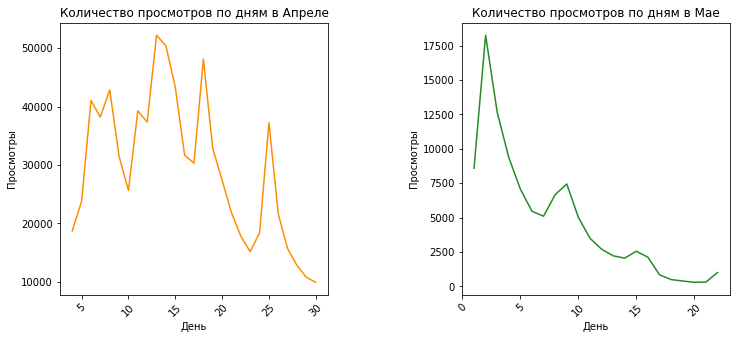

In [34]:
day_views(4, 'April', 'Апреле', 5, 'May', 'Мае')

Непонятная динамика просмотров. Интересно, что пики не приходятся на выходные. Я думаю, что больше всего просмотров в день выхода эпизода популярного тайтла.